### reference
```
https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK
```

In [40]:
import os
import nltk.data
import networkx as nx
from nltk.parse import CoreNLPParser, CoreNLPDependencyParser
from nltk.parse.corenlp import CoreNLPServer

SERVER_URL = 'http://localhost:9000'

test_reviews = ['The class was not really that great.', 'The office hours were terrible, but the content was interesting.']


```
lsof -t -i:9000
kill -9 $(lsof -t -i:9000)
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000
```

In [41]:
parser = CoreNLPParser(url=SERVER_URL)
list(parser.parse(test_reviews[1].split()))

[Tree('ROOT', [Tree('S', [Tree('S', [Tree('NP', [Tree('DT', ['The']), Tree('NN', ['office']), Tree('NNS', ['hours'])]), Tree('VP', [Tree('VBD', ['were']), Tree('ADJP', [Tree('JJ', ['terrible'])])])]), Tree(',', [',']), Tree('CC', ['but']), Tree('S', [Tree('NP', [Tree('DT', ['the']), Tree('NN', ['content'])]), Tree('VP', [Tree('VBD', ['was']), Tree('ADJP', [Tree('JJ', ['interesting'])])])]), Tree('.', ['.'])])])]

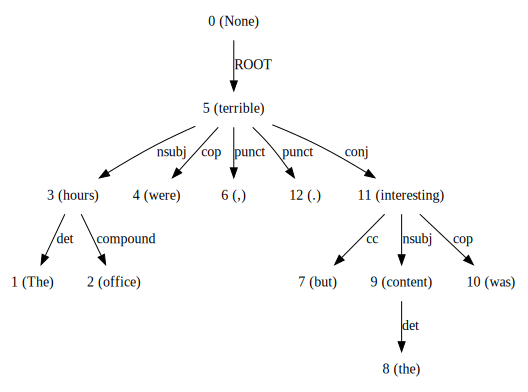

In [42]:
dep_parser = CoreNLPDependencyParser(url=SERVER_URL)
dep_grph = list(dep_parser.parse(test_reviews[1].split()))[0]
dep_grph

In [38]:
for i in range(len(dep_grph.nodes)):
    print(f"Word: {dep_grph.nodes[i]['word']}\tLemma: {dep_grph.nodes[i]['lemma']}\tTag: {dep_grph.nodes[i]['tag']}\tHead: {dep_grph.nodes[i]['head']}\tRel: {dep_grph.nodes[i]['rel']}")

Word: None	Lemma: None	Tag: TOP	Head: None	Rel: None
Word: The	Lemma: the	Tag: DT	Head: 2	Rel: det
Word: class	Lemma: class	Tag: NN	Head: 7	Rel: nsubj
Word: was	Lemma: be	Tag: VBD	Head: 7	Rel: cop
Word: not	Lemma: not	Tag: RB	Head: 7	Rel: advmod
Word: really	Lemma: really	Tag: RB	Head: 7	Rel: advmod
Word: that	Lemma: that	Tag: IN	Head: 7	Rel: mark
Word: great	Lemma: great	Tag: JJ	Head: 0	Rel: ROOT
Word: .	Lemma: .	Tag: .	Head: 7	Rel: punct


In [43]:
dep_grph.nodes

defaultdict(<function nltk.parse.dependencygraph.DependencyGraph.__init__.<locals>.<lambda>()>,
            {0: {'address': 0,
              'word': None,
              'lemma': None,
              'ctag': 'TOP',
              'tag': 'TOP',
              'feats': None,
              'head': None,
              'deps': defaultdict(list, {'ROOT': [5]}),
              'rel': None},
             1: {'address': 1,
              'word': 'The',
              'lemma': 'the',
              'ctag': 'DT',
              'tag': 'DT',
              'feats': '_',
              'head': 3,
              'deps': defaultdict(list, {}),
              'rel': 'det'},
             3: {'address': 3,
              'word': 'hours',
              'lemma': 'hour',
              'ctag': 'NNS',
              'tag': 'NNS',
              'feats': '_',
              'head': 5,
              'deps': defaultdict(list, {'det': [1], 'compound': [2]}),
              'rel': 'nsubj'},
             2: {'address': 2,
         